<a href="https://colab.research.google.com/github/narennravi/Assignment_ML-Algorithms/blob/master/7.7__Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Social_Network_Ads.csv

#-----------------------------------------------------------------------------

## **Importing the libraries**

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import tree
from sklearn.model_selection import cross_val_score

# import necessary modules from respective libraries

#-----------------------------------------------------------------------------

## **Importing the dataset**

In [3]:
df=pd.read_csv("/content/7.3__Social_Network_Ads.csv")
df.head()

# Upload csv file in file-section(copy_path) & paste in df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop('User ID', axis=1, inplace =True)
df["Gender"]=df["Gender"].replace({"Male":0,"Female":1})

# gender column - classifying (male --as--> 0)  &  (female --as--> 1)
# apply changes to df --> inplace=True 

#-----------------------------------------------------------------------------

## **Splitting the dataset into the Training set and Test set**

In [5]:
X=df.iloc[:,:3].values
y=df.iloc[:,3].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
 

#-----------------------------------------------------------------------------

## **Feature Scaling**

In [6]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

#-----------------------------------------------------------------------------

## **Fitting Decision Tree Classification to the Training set**

In [7]:
model = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)

In [8]:
model.tree_.max_depth

#pruning tree count

11

#-----------------------------------------------------------------------------

## **Pre-pruning Trial**
>>### 1.Gini method

Accuracy for gini method
    depth  Accuracy
0       1  0.821429
1       2  0.907143
2       3  0.889286
3       4  0.878571
4       5  0.853571
5       6  0.853571
6       7  0.857143
7       8  0.857143
8       9  0.850000
9      10  0.846429
10     11  0.842857


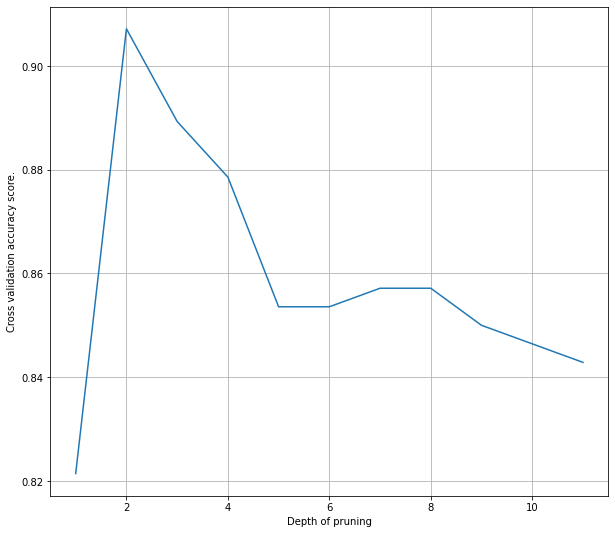

In [9]:
depth=np.arange(1,12)
accuracy=[] #cross validation accuracy 
for i in range(1,12):
  model_1 = tree.DecisionTreeClassifier(criterion="gini", random_state=0, max_depth =i)
  scores = cross_val_score(model_1,X_train,y_train,cv=5,scoring='accuracy')
  accuracy.append(scores.mean()) 

df_accuracy= pd.DataFrame({'depth': depth, 'Accuracy':accuracy})
print("Accuracy for gini method")
print(df_accuracy)  

plt.figure(figsize=(10,9))
plt.plot(depth,accuracy)
plt.xlabel('Depth of pruning')
plt.ylabel('Cross validation accuracy score.')
plt.grid(True)
plt.show()

# pre-pruning trial
# accuracy in form of gini method

## **Pre-pruning Trial**
>>### 1.Entropy method

Accuracy for entropy method
    depth  Accuracy
0       1  0.821429
1       2  0.907143
2       3  0.903571
3       4  0.875000
4       5  0.871429
5       6  0.864286
6       7  0.871429
7       8  0.850000
8       9  0.864286
9      10  0.864286
10     11  0.857143


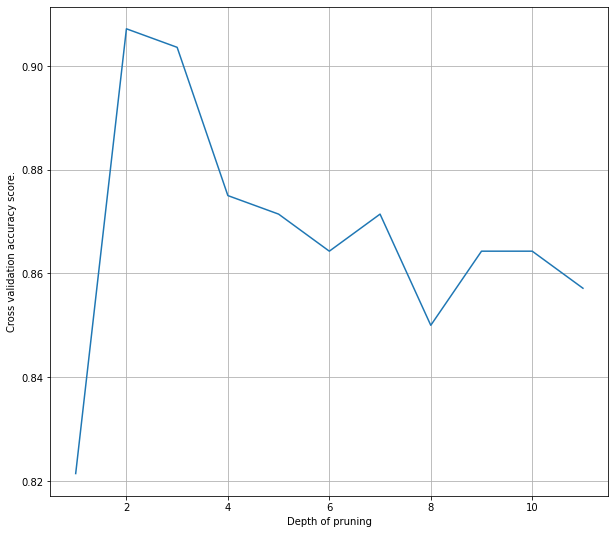

In [10]:
depth=np.arange(1,12)
accuracy=[] #cross validation accuracy 
for i in range(1,12):
  model_1 = tree.DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth =i)
  scores = cross_val_score(model_1,X_train,y_train,cv=5,scoring='accuracy')
  accuracy.append(scores.mean()) 

df_accuracy= pd.DataFrame({'depth': depth, 'Accuracy':accuracy})
print("Accuracy for entropy method")
print(df_accuracy)

plt.figure(figsize=(10,9))
plt.plot(depth,accuracy)
plt.xlabel('Depth of pruning')
plt.ylabel('Cross validation accuracy score.')
plt.grid(True)
plt.show()

# pre-pruning trial
# accuracy in form of entropy method

#-----------------------------------------------------------------------------

## **Predicting the Test set results**

In [11]:
model = tree.DecisionTreeClassifier(criterion="entropy", random_state=0,max_depth=2)
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)

# Through the course of my learning I'have learned to choose entropy(information gain) for classification 

#-----------------------------------------------------------------------------

## **Making the Confusion Matrix**

In [12]:
print("Confusion Matrix: \n",confusion_matrix(y_test, y_test_pred))

# print(f'Train score {accuracy_score(y_train_pred,y_train)}')
# print(f'Test score {accuracy_score(y_test_pred,y_test)}')
# plot_confusionmatrix(y_train_pred,y_train,dom='Train')
# plot_confusionmatrix(y_test_pred,y_test,dom='Test')

Confusion Matrix: 
 [[72  7]
 [ 3 38]]


In [13]:
print("Accuracy: ",accuracy_score(y_test, y_test_pred))

# Display Accuracy score of model

Accuracy:  0.9166666666666666


>>Hence the "Accuracy score is **0.916**" (Great fit)




In [14]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        79
           1       0.84      0.93      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.92      0.91       120
weighted avg       0.92      0.92      0.92       120



#-----------------------------------------------------------------------------

## **Visualising the Training set results**

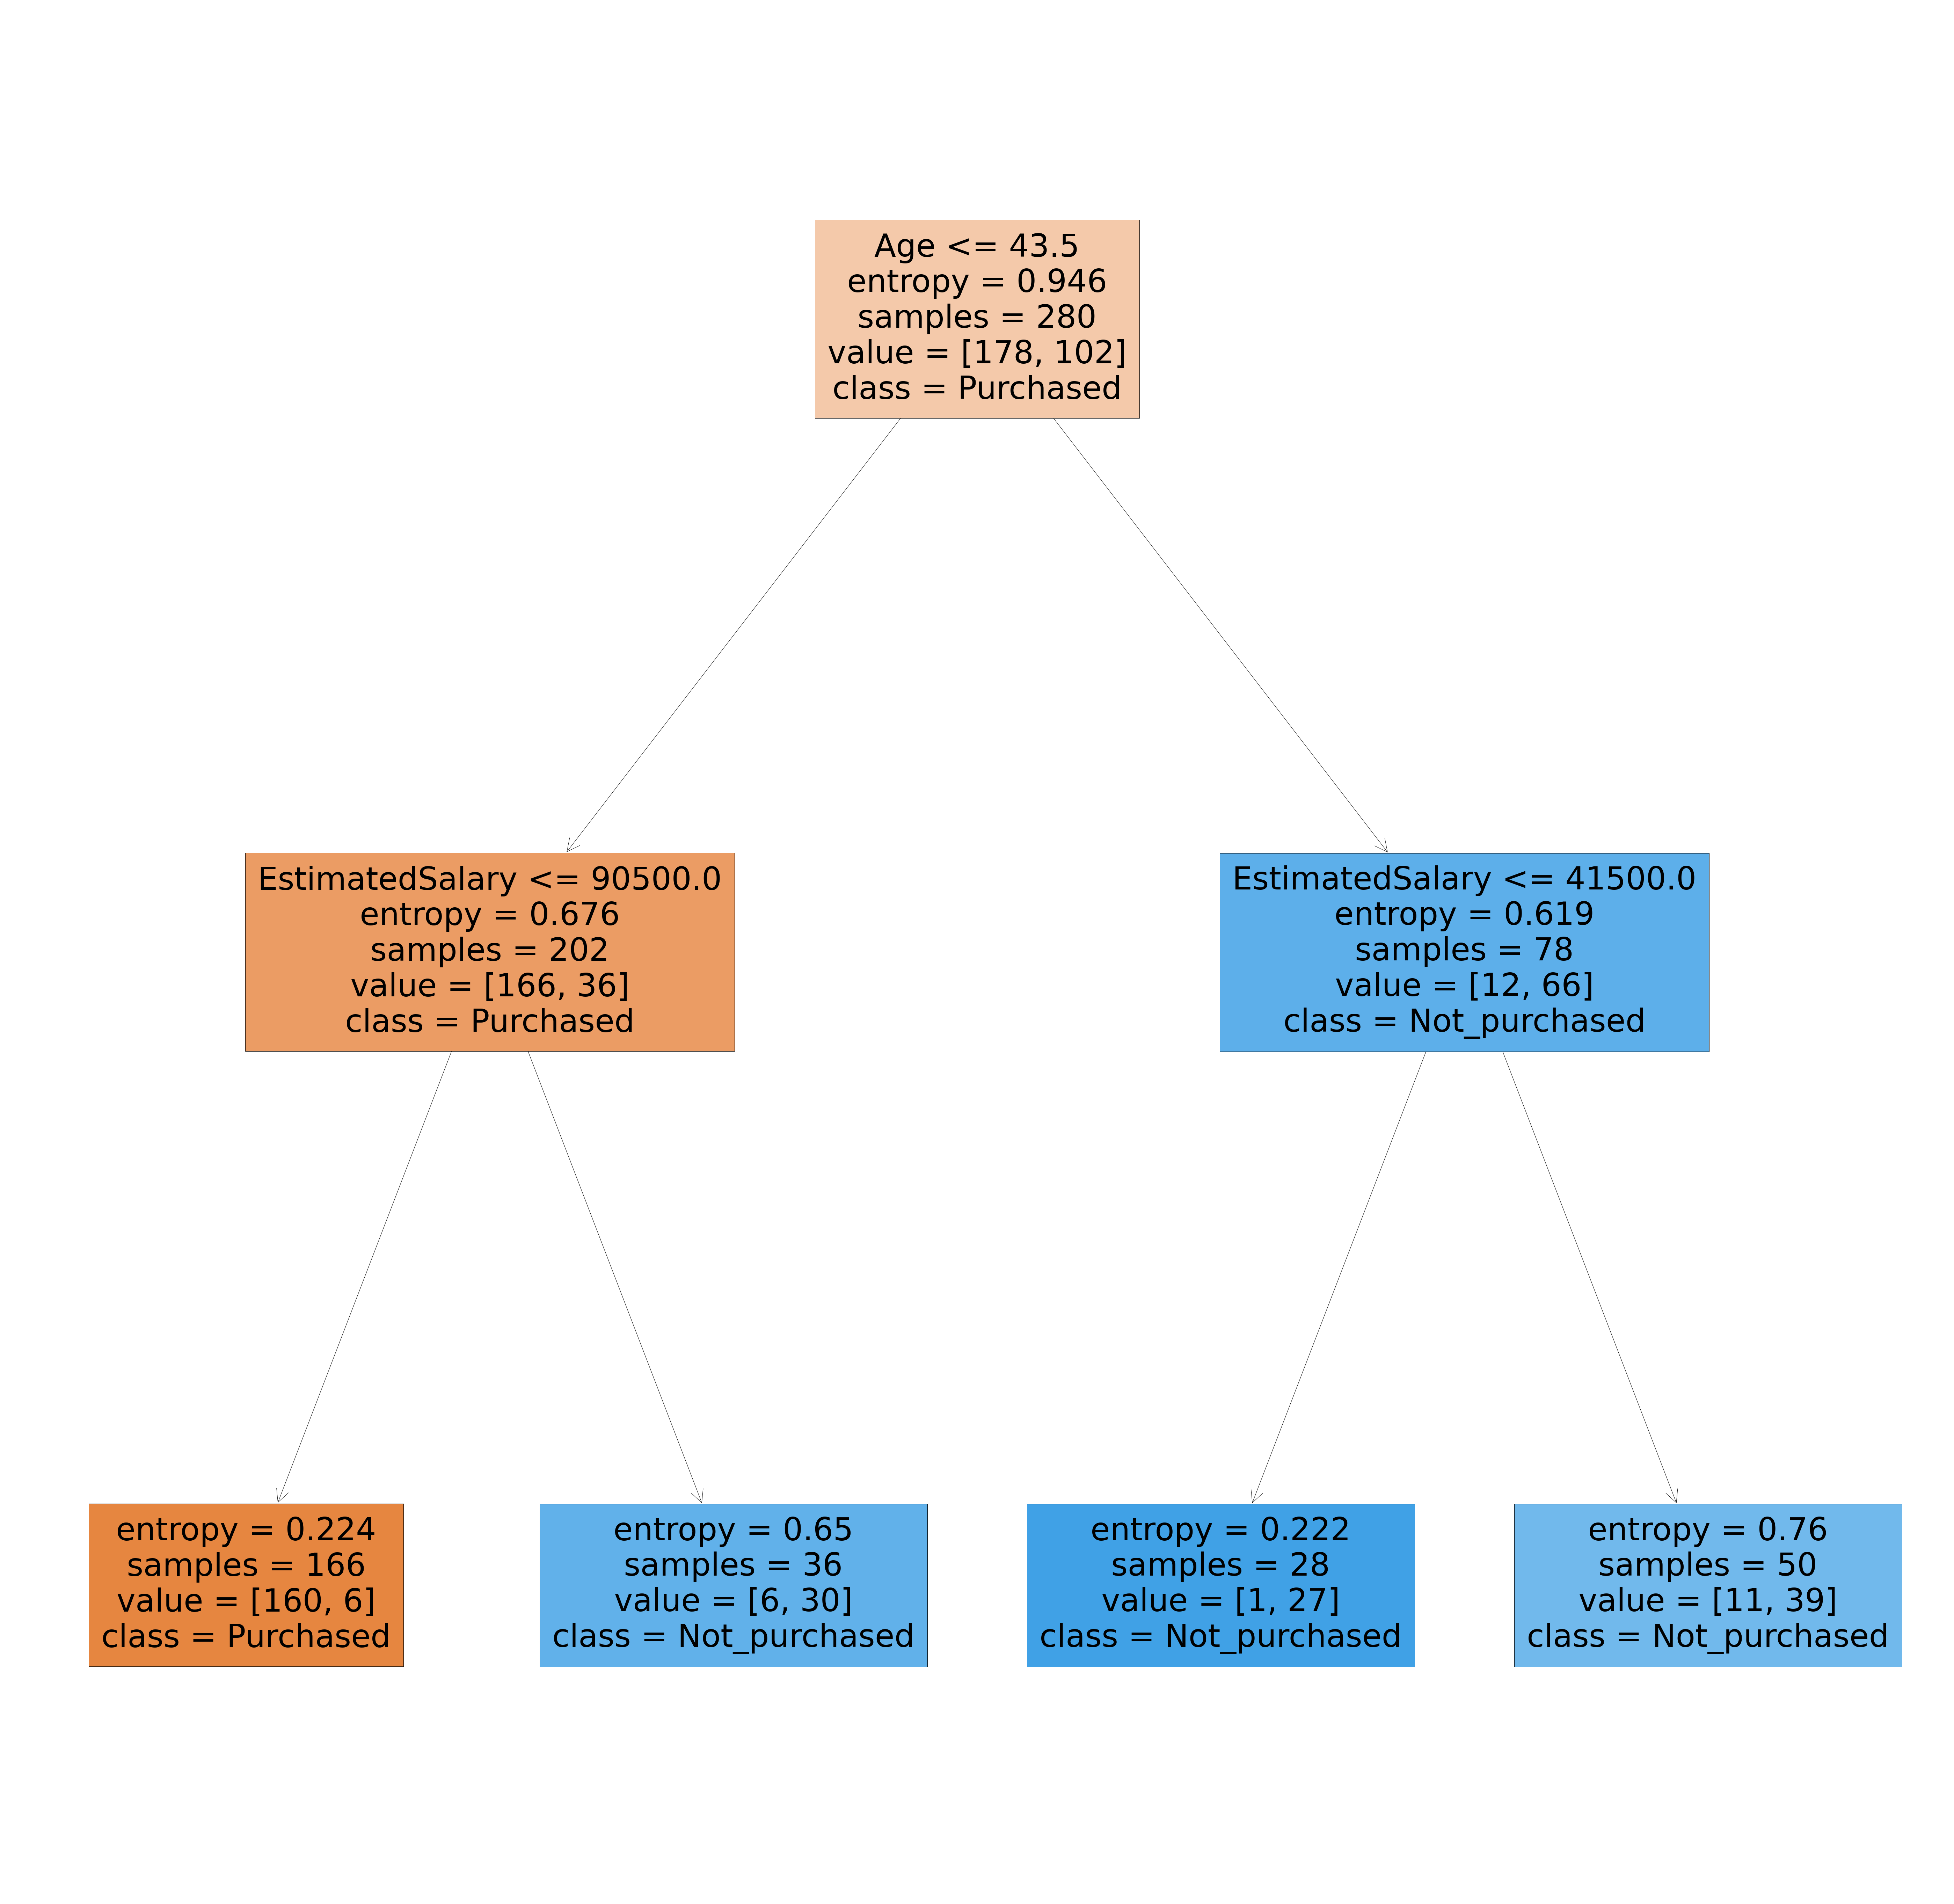

In [15]:
plt.figure(figsize=(100,100))
features = df.columns
classes = ['Purchased','Not_purchased']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

#-----------------------------------------------------------------------------